In [215]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [216]:
df=pd.read_csv('D:/DataScience/Data/Estate.csv')

In [217]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [219]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [220]:
sim=SimpleImputer(missing_values=np.nan,strategy='mean')
df['RM']=sim.fit_transform(df[['RM']])

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       511 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


<Axes: >

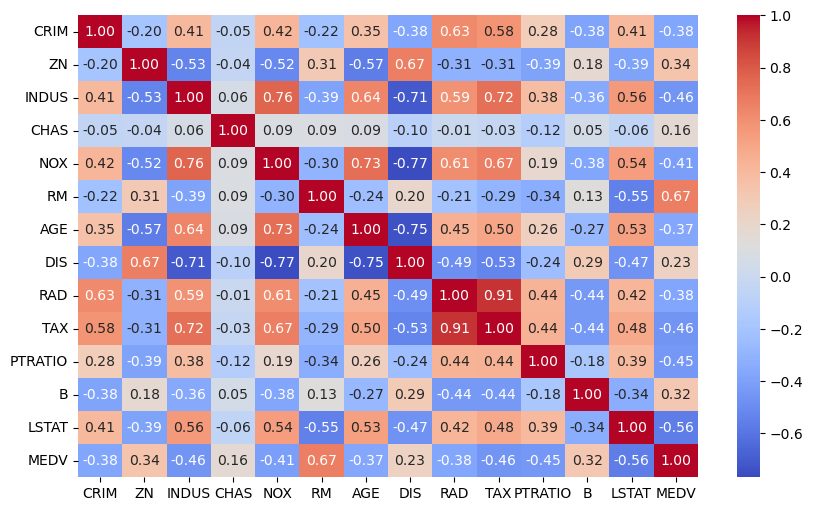

In [222]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm',fmt='.2f')

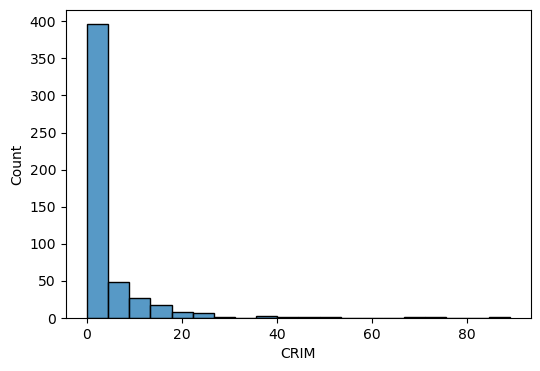

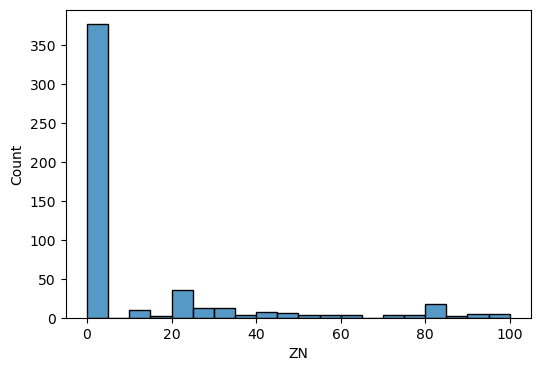

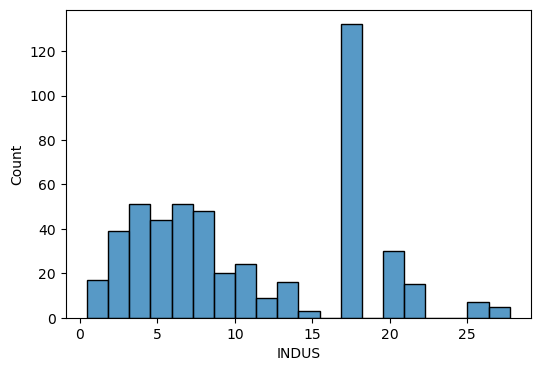

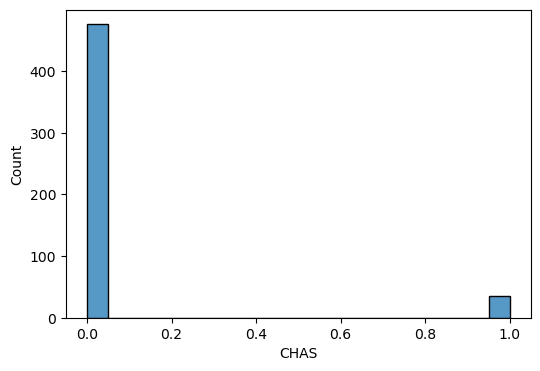

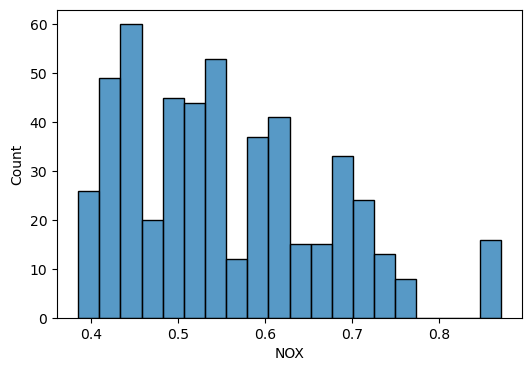

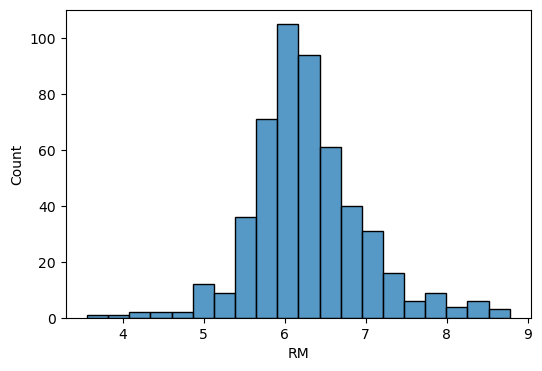

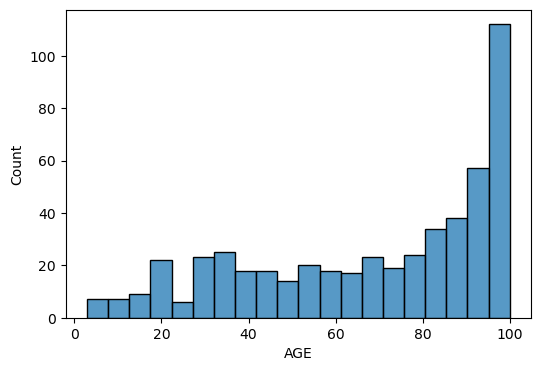

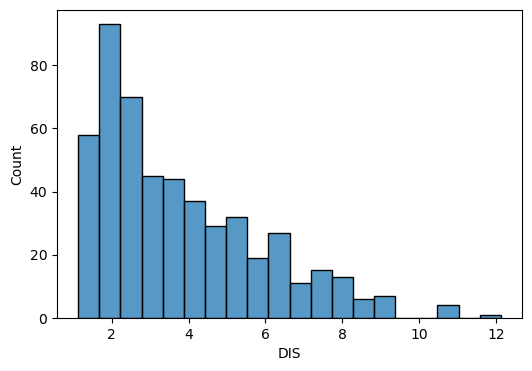

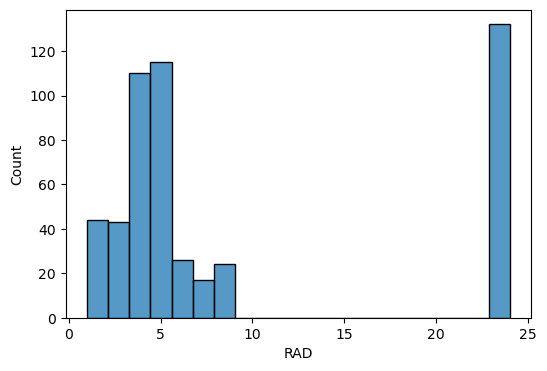

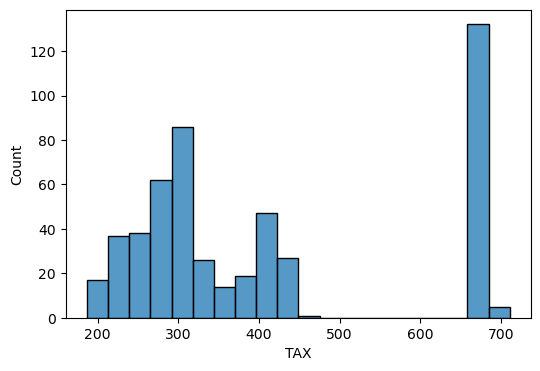

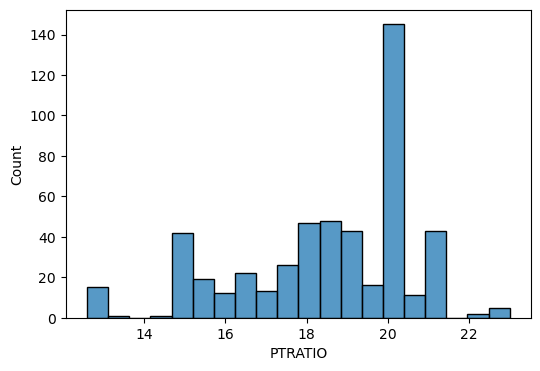

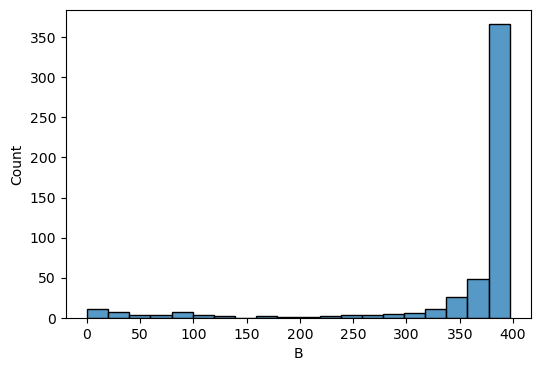

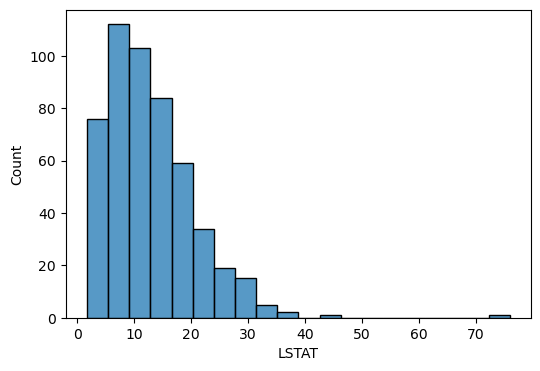

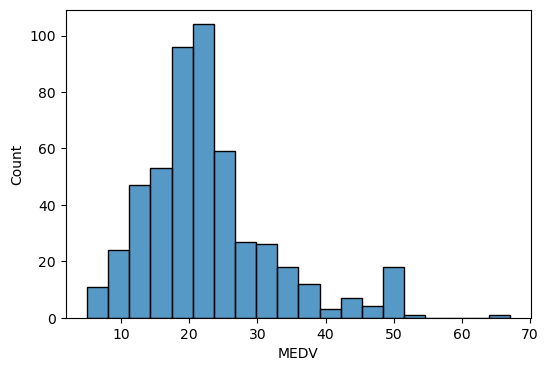

In [223]:
for i in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[i],bins=20)
    plt.show()

In [224]:
X=df.drop('MEDV',axis=1)
y=df['MEDV']

In [225]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [226]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [227]:
xgb=XGBRegressor(n_estimators=1000,max_depth=20,early_stopping_rounds=None,learning_rate=0.05,n_jobs=-1,random_state=42)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [228]:
y_pred=xgb.predict(X_test)    

In [229]:
T=pd.DataFrame({'Gia tri thuc':y_test,'Du doan':y_pred,'Chenh lenh':y_pred-y_test})
T.sort_values('Chenh lenh',ascending=False).head()

,Gia tri thuc,Du doan,Chenh lenh
506,12.0,26.869656,14.869656
505,11.9,21.785727,9.885727
426,10.2,16.115320,5.915320
375,15.0,20.824917,5.824917
342,16.5,22.288931,5.788931


In [230]:
score=xgb.score(X_test,y_test)
score

0.6041189233136754

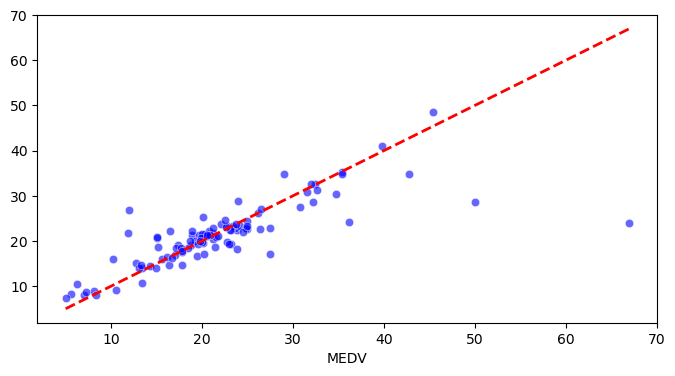

In [231]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=y_test, y=y_pred.flatten(), color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

In [232]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor(max_depth=20,n_estimators=1000,n_jobs=-1,random_state=42)
random.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [233]:
y_pred=random.predict(X_test)
score=random.score(X_test,y_test)
score

0.6838723266958193

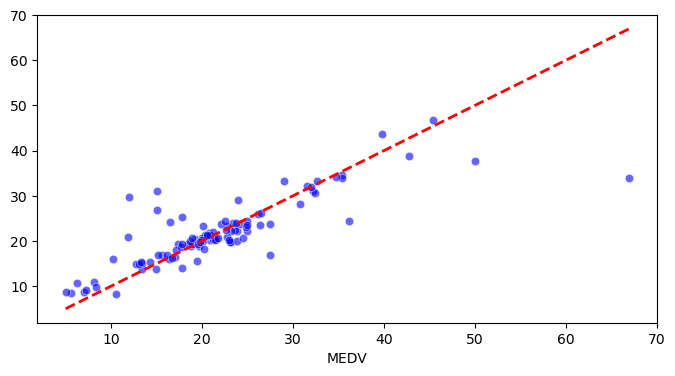

In [234]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=y_test, y=y_pred.flatten(), color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

In [235]:
from sklearn.ensemble import VotingRegressor
model=VotingRegressor(estimators=[('xgb',xgb),('rf',random)])
model.fit(X_train,y_train)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constrain...
                                          learning_rate=0.05, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=20,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=1000, n_jobs=-1,
                                          num_parallel_tree=None, ...)),
                            ('rf',
                             RandomForestRegressor(max_depth=20,
                                                   n_estimators=1000, n_jobs=-1,
                                                   random_state=42))])

In [236]:
y_pred=model.predict(X_test)
score=model.score(X_test,y_test)
score

0.6592605347942513

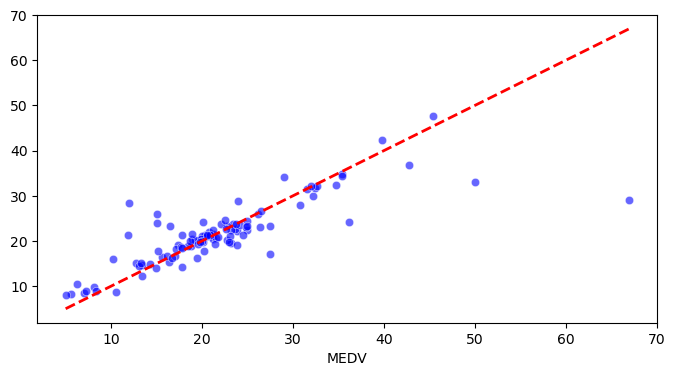

In [240]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=y_test, y=y_pred.flatten(), color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()